In [223]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


C:\Users\X9249367\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'rate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [224]:
df = pd.read_csv("Clean/reports21data.csv",sep = ";",decimal = ".",encoding = "latin-1")

In [225]:
df.head()

,DATE,TIME,LEFT CURRENT [A],LEFT POWER [W],LEFT RESISTANCE [Ohm],LEFT VOLTAGE [V],RIGHT CURRENT [A],RIGHT POWER [W],RIGHTRESISTANCE [Ohm],RIGHT VOLTAGE [V],WIRE FUNCTIONAL,CYCLE TIME[Sn]
0,08.06.2017,10:37,27.53,415.42,0.55,15.09,28.31,426.03,0.53,15.05,OK,56
1,08.06.2017,10:38,27.82,419.76,0.54,15.09,28.74,432.54,0.52,15.05,DEFECT,56
2,08.06.2017,10:40,27.79,419.33,0.54,15.09,28.68,431.67,0.52,15.05,DEFECT,57
3,08.06.2017,10:42,27.73,418.46,0.54,15.09,28.63,430.80,0.53,15.05,DEFECT,57
4,08.06.2017,10:45,27.91,421.07,0.54,15.09,28.86,434.27,0.52,15.05,DEFECT,56


> GRAPHICAL ANALYSIS

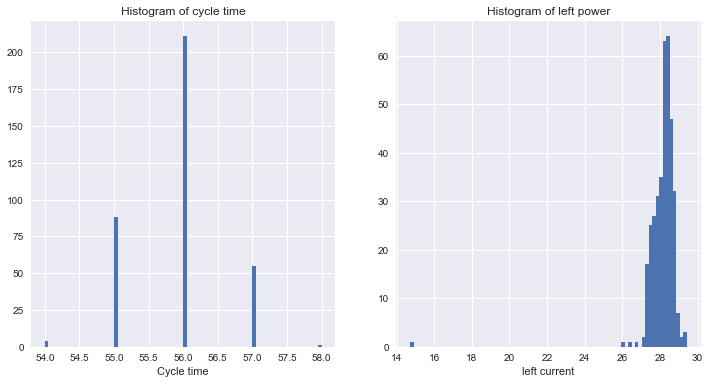

In [226]:
fig = plt.figure(figsize=(12, 6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df['CYCLE TIME[Sn]'], bins=80)
sqft.set_xlabel('Cycle time')
sqft.set_title("Histogram of cycle time")

cost.hist(df['LEFT CURRENT [A]'], bins=80)
cost.set_xlabel('left current')
cost.set_title("Histogram of left power")

plt.show()

> WE WILL TRY TO SEE IF THERE IS A LINEAR REGRESSION BETWEEN PAIR OF COLUMNS

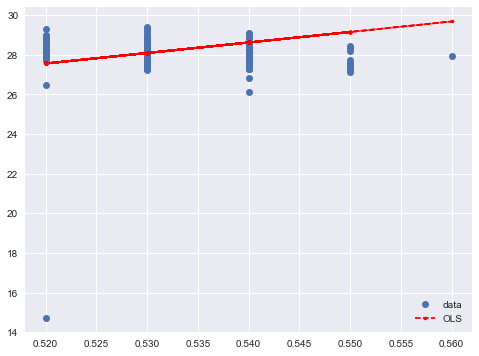

In [227]:
y = df['LEFT CURRENT [A]']
x = df['RIGHTRESISTANCE [Ohm]']
result=sm.OLS(y,x).fit()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, result.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')

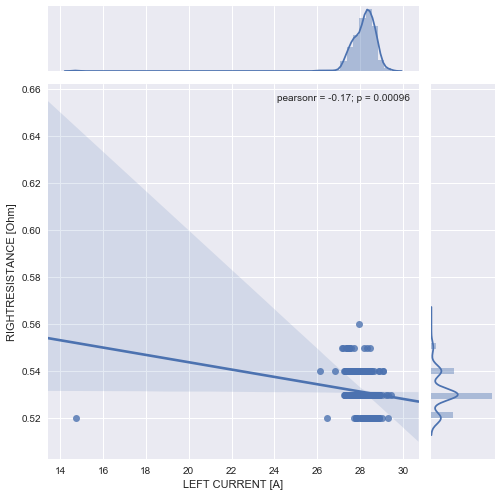

In [228]:
sns.jointplot(x="LEFT CURRENT [A]", y="RIGHTRESISTANCE [Ohm]", data=df, kind = 'reg',fit_reg= True, size = 7)
plt.show()

> Result: if there is a relation it is not a linear relation